In [37]:
pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd

# Load the dataset
file_path = 'Crash_Reporting_-_Incidents_Data.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

C:\Users\bhars\AppData\Local\Temp\ipykernel_26656\2521236357.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Agency Name       ACRS Report Type  Crash Date/Time Hit/Run  \
0   Montgomery County Police           Injury Crash    3/4/2019 8:41      No   
1   Montgomery County Police  Property Damage Crash   6/4/2016 19:14     Yes   
2                 MONTGOMERY  Property Damage Crash  8/18/2015 23:00      No   
3   Montgomery County Police           Injury Crash   8/24/2023 7:46      No   
4  Rockville Police Departme  Property Damage Crash  8/12/2023 16:28     Yes   

         Route Type Lane Direction Number of Lanes Direction  Distance  \
0  Maryland (State)           West               2      East     200.0   
1            County           East               1      East     500.0   
2            County          South               2     South      30.0   
3  Maryland (State)           West               4      West      50.0   
4               NaN          South               3     South      40.0   

  Distance Unit  ... Driver Substance Abuse First Harmful Event  \
0          FEET  ...          NONE DETECTED       OTHER VEHICLE   
1          FEET  ...                UNKNOWN      PARKED VEHICLE   
2          FEET  ...          NONE DETECTED      PARKED VEHICLE   
3          FEET  ...          NONE DETECTED                 NaN   
4          FEET  ...                    NaN       OTHER VEHICLE   

  Second Harmful Event          Junction Intersection Type Road Alignment  \
0                  NaN  NON INTERSECTION               NaN       STRAIGHT   
1        OTHER VEHICLE  NON INTERSECTION               NaN       STRAIGHT   
2                  NaN  NON INTERSECTION               NaN       STRAIGHT   
3                  NaN  NON INTERSECTION               NaN     CURVE LEFT   
4        OTHER VEHICLE               NaN               NaN       STRAIGHT   

  Road Condition                              Road Division   Latitude  \
0     NO DEFECTS                       TWO-WAY, NOT DIVIDED  39.113113   
1     NO DEFECTS                       TWO-WAY, NOT DIVIDED  38.982443   
2     NO DEFECTS                       TWO-WAY, NOT DIVIDED  39.189845   
3     NO DEFECTS  TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER  39.041698   
4     NO DEFECTS                       TWO-WAY, NOT DIVIDED  39.084720   

   Longitude  
0 -77.057592  
1 -77.079235  
2 -77.230325  
3 -77.050125  
4 -77.148200  

[5 rows x 27 columns]

In [41]:
# Calculate the number and percentage of missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a single DataFrame for better visibility
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

# Display columns with missing values
missing_data[missing_data['Missing Values'] > 0]

Missing Values  Missing Percentage
Hit/Run                           2081            1.910243
Route Type                       14383           13.202802
Lane Direction                   13743           12.615317
Number of Lanes                  12339           11.326522
Direction                        13726           12.599712
Distance                         11863           10.889580
Distance Unit                    12327           11.315507
Road Grade                       14354           13.176181
Collision Type                     504            0.462644
Weather                           7948            7.295826
Surface Condition                16096           14.775241
Light                              815            0.748125
Traffic Control                  17790           16.330240
Driver Substance Abuse           15688           14.400720
First Harmful Event                650            0.596664
Second Harmful Event             80539           73.930365
Junction                         27819           25.536309
Intersection Type                57310           52.607423
Road Alignment                   14136           12.976069
Road Condition                   19040           17.477671
Road Division                    14916           13.692066

In [43]:
# Check the data types and unique values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108939 entries, 0 to 108938
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Agency Name             108939 non-null  object 
 1   ACRS Report Type        108939 non-null  object 
 2   Crash Date/Time         108939 non-null  object 
 3   Hit/Run                 106858 non-null  object 
 4   Route Type              94556 non-null   object 
 5   Lane Direction          95196 non-null   object 
 6   Number of Lanes         96600 non-null   object 
 7   Direction               95213 non-null   object 
 8   Distance                97076 non-null   float64
 9   Distance Unit           96612 non-null   object 
 10  Road Grade              94585 non-null   object 
 11  At Fault                108939 non-null  object 
 12  Collision Type          108435 non-null  object 
 13  Weather                 100991 non-null  object 
 14  Surface Condition   

In [45]:
df.describe(include='all').T

count  unique  \
Agency Name               108939      10   
ACRS Report Type          108939       3   
Crash Date/Time           108939  106260   
Hit/Run                   106858       2   
Route Type                 94556      19   
Lane Direction             95196      35   
Number of Lanes          96600.0    96.0   
Direction                  95213       5   
Distance                 97076.0     NaN   
Distance Unit              96612       3   
Road Grade                 94585      22   
At Fault                  108939       4   
Collision Type            108435      28   
Weather                   100991      22   
Surface Condition          92843      21   
Light                     108124      16   
Traffic Control            91149      69   
Driver Substance Abuse     93251     104   
First Harmful Event       108289      65   
Second Harmful Event       28400      64   
Junction                   81120      21   
Intersection Type          51629      11   
Road Alignment             94803      12   
Road Condition             89899      21   
Road Division              94023      32   
Latitude                108939.0     NaN   
Longitude               108939.0     NaN   

                                                              top     freq  \
Agency Name                              Montgomery County Police    78093   
ACRS Report Type                            Property Damage Crash    71649   
Crash Date/Time                                   5/22/2015 21:55        5   
Hit/Run                                                        No    88584   
Route Type                                       Maryland (State)    39121   
Lane Direction                                              North    25905   
Number of Lanes                                               2.0  22075.0   
Direction                                                   North    38801   
Distance                                                      NaN      NaN   
Distance Unit                                                FEET    90361   
Road Grade                                                  LEVEL    64578   
At Fault                                                   DRIVER    96895   
Collision Type                                  SAME DIR REAR END    25739   
Weather                                                     CLEAR    65516   
Surface Condition                                             DRY    64948   
Light                                                    DAYLIGHT    63190   
Traffic Control                                       NO CONTROLS    41605   
Driver Substance Abuse                              NONE DETECTED    60777   
First Harmful Event                                 OTHER VEHICLE    66578   
Second Harmful Event                                OTHER VEHICLE    12119   
Junction                                             INTERSECTION    32164   
Intersection Type                           FOUR-WAY INTERSECTION    30613   
Road Alignment                                           STRAIGHT    74048   
Road Condition                                         NO DEFECTS    80463   
Road Division           TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER    39861   
Latitude                                                      NaN      NaN   
Longitude                                                     NaN      NaN   

                             mean         std     min        25%        50%  \
Agency Name                   NaN         NaN     NaN        NaN        NaN   
ACRS Report Type              NaN         NaN     NaN        NaN        NaN   
Crash Date/Time               NaN         NaN     NaN        NaN        NaN   
Hit/Run                       NaN         NaN     NaN        NaN        NaN   
Route Type                    NaN         NaN     NaN        NaN        NaN   
Lane Direction                NaN         NaN     NaN        NaN        NaN   
Number of Lanes               NaN         NaN     NaN   

# Varience/Data Distribution of the dataset

Data variance of each column:

Distance     18686.445898
Latitude         0.005291
Longitude        0.009866
dtype: float64


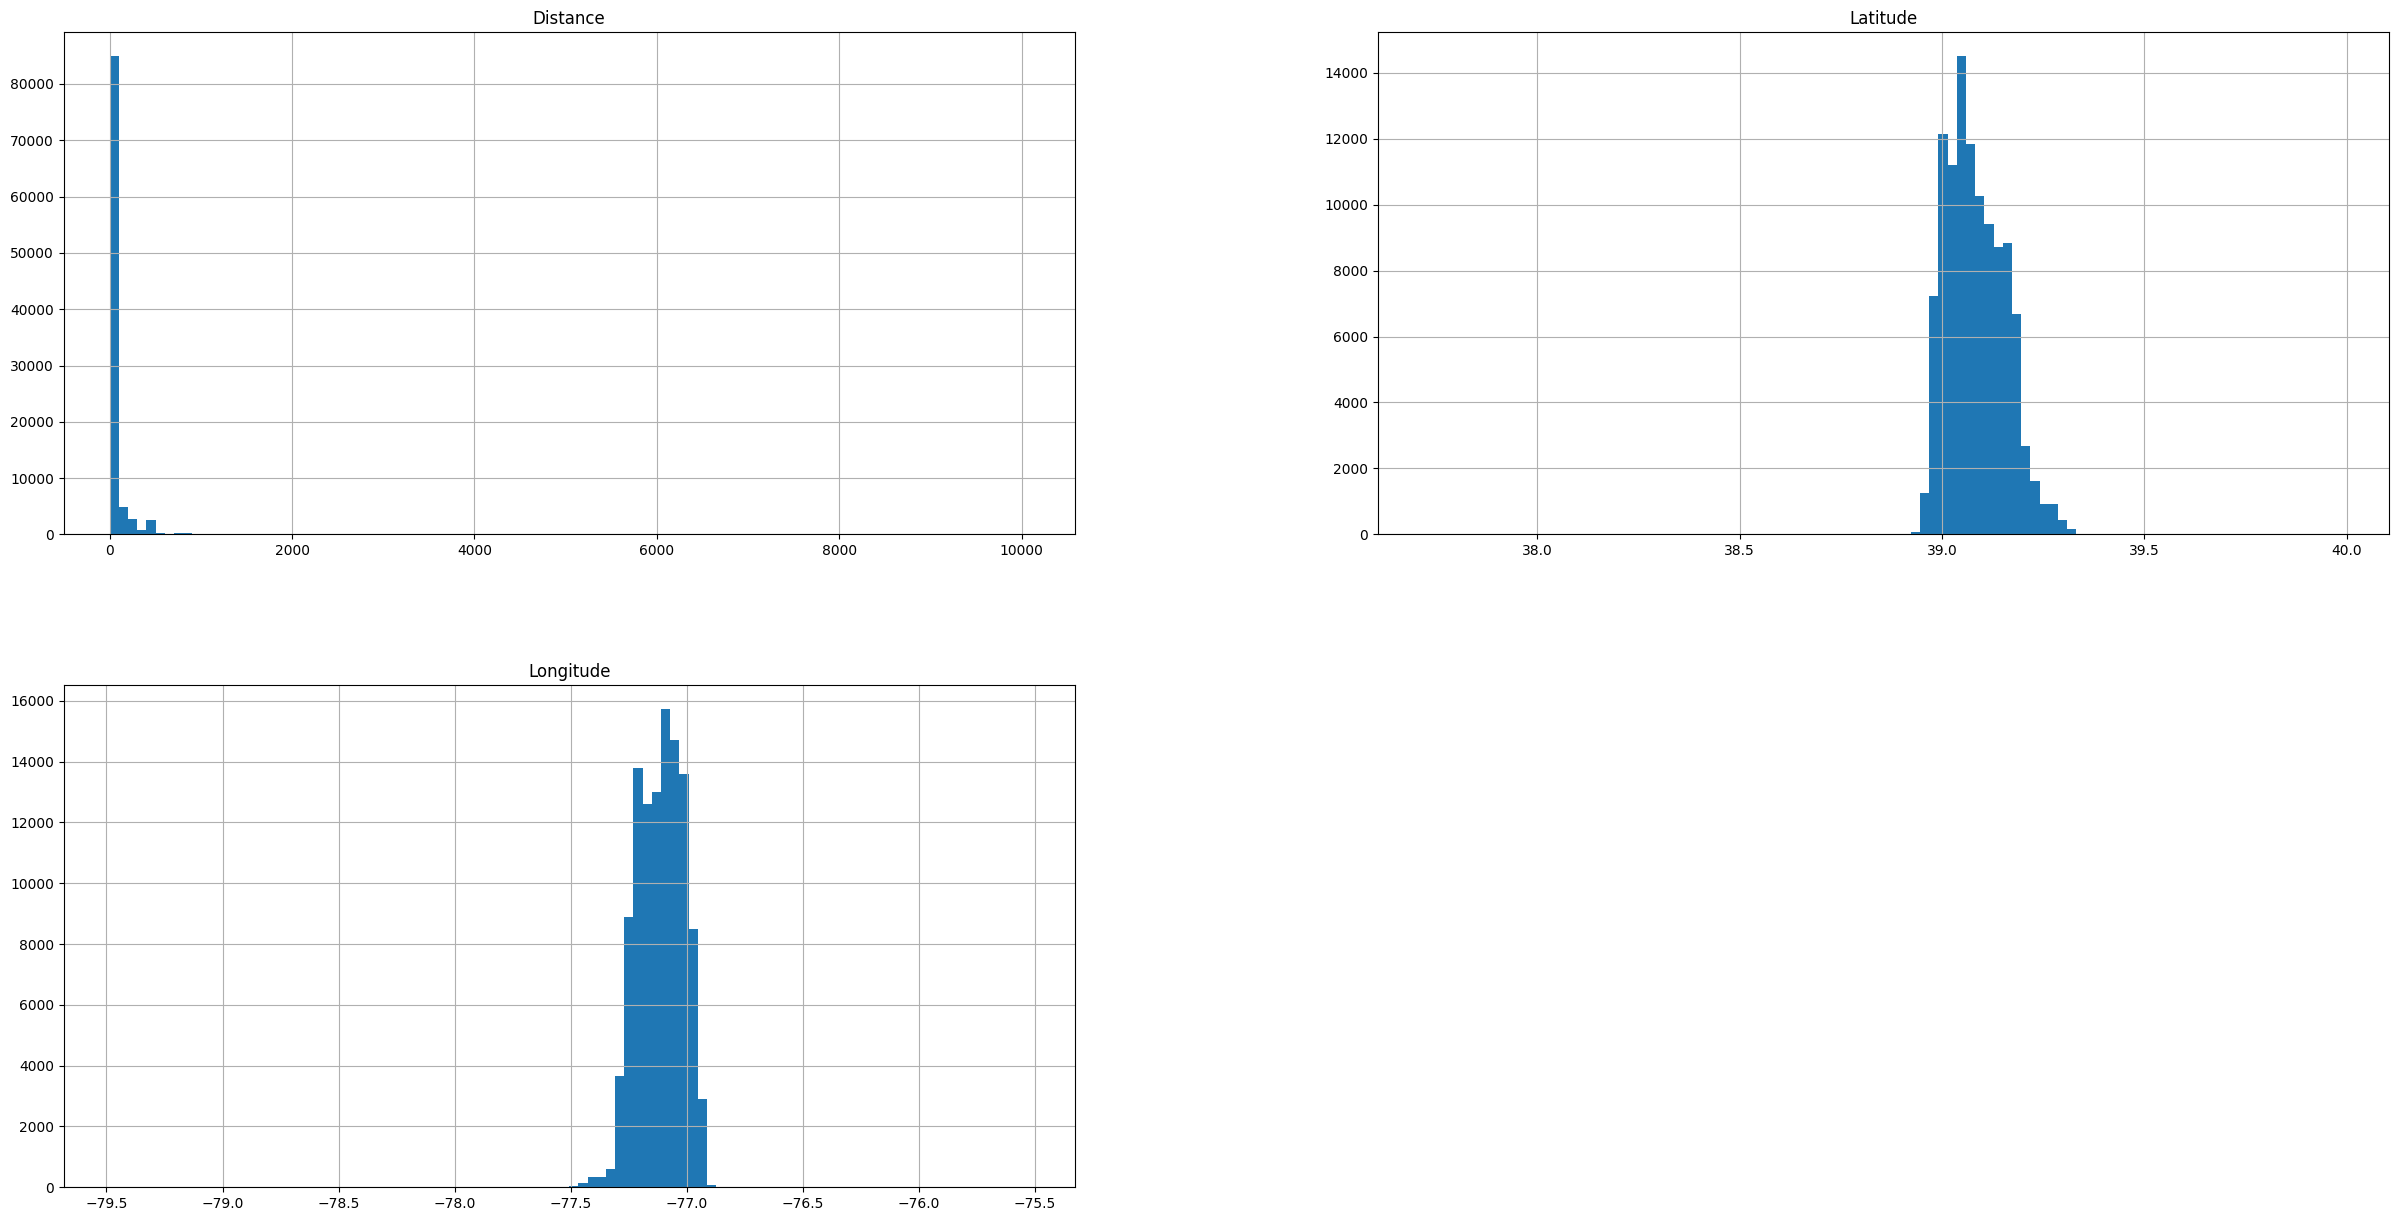

In [48]:
import matplotlib.pyplot as plt
print("Data variance of each column:\n")
temp = df.select_dtypes(include=['number'])
print(temp.var())

temp.hist(figsize=(30, 15), bins=100)
plt.show()

In [ ]:
# # Identify categorical and numerical columns
# categorical_columns = ['Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Hit/Run', 'Route Type',
#                              'Lane Direction', 'Number of Lanes', 'Direction', 'Distance Unit', 'Road Grade',
#                              'At Fault', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 
#                              'Traffic Control', 'Driver Substance Abuse', 'First Harmful Event', 'Second Harmful Event',
#                              'Junction', 'Intersection Type', 'Road Alignment', 'Road Condition', 'Road Division']
                             
# numerical_columns = ['Distance', 'Latitude', 'Longitude']
# df_clean = df.dropna(subset=categorical_columns + numerical_columns)

# anova_results = []

# for cat_col in categorical_columns:
#     for num_col in numerical_columns:
#         if df_clean[cat_col].nunique() > 1:
#             groups = [df_clean[df_clean[cat_col] == cat_value][num_col] for cat_value in df_clean[cat_col].unique()]
#             try:
#                 stat, p_value = f_oneway(*groups)
#                 anova_results.append({'Categorical Variable': cat_col, 'Numerical Variable': num_col, 
#                                       'F-value': stat, 'P-Value': p_value})
#             except:
#                 pass

# pd.options.display.float_format = '{:.5f}'.format

# anova_df = pd.DataFrame(anova_results)

# print(anova_df)

# pd.reset_option('display.float_format')

In [50]:
# Fill missing values for categorical columns with the most frequent value (mode)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent, inplace=True)

C:\Users\bhars\AppData\Local\Temp\ipykernel_26656\1999875437.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)


In [52]:
# Fill missing values for numerical columns with their median
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [54]:
# Verify no missing values remain
df.isnull().sum()

Agency Name               0
ACRS Report Type          0
Crash Date/Time           0
Hit/Run                   0
Route Type                0
Lane Direction            0
Number of Lanes           0
Direction                 0
Distance                  0
Distance Unit             0
Road Grade                0
At Fault                  0
Collision Type            0
Weather                   0
Surface Condition         0
Light                     0
Traffic Control           0
Driver Substance Abuse    0
First Harmful Event       0
Second Harmful Event      0
Junction                  0
Intersection Type         0
Road Alignment            0
Road Condition            0
Road Division             0
Latitude                  0
Longitude                 0
dtype: int64

In [56]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [58]:
# Standardize text columns by converting to uppercase
for col in categorical_cols:
    df[col] = df[col].str.upper()

In [60]:
# Identify potential outliers in numerical columns using IQR
numerical_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    numerical_summary[col] = outliers

# Display columns with potential outliers
numerical_summary

{'Distance': 12140, 'Latitude': 225, 'Longitude': 308}

In [65]:
# Convert 'Number of Lanes' to numeric, forcing errors to NaN
df['Number of Lanes'] = pd.to_numeric(df['Number of Lanes'], errors='coerce')

# Drop or fill NaN if necessary
df['Number of Lanes'].fillna(df['Number of Lanes'].median(), inplace=True)

# Cap outliers using IQR
for col in ['Number of Lanes', 'Distance', 'Latitude', 'Longitude']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Verify results
print(df[['Number of Lanes', 'Distance', 'Latitude', 'Longitude']].describe())


       Number of Lanes       Distance       Latitude      Longitude
count         108936.0  108936.000000  108936.000000  108936.000000
mean               2.0      24.652050      39.084274     -77.114041
std                0.0      38.032986       0.071651       0.095837
min                2.0       0.000000      38.853436     -77.418818
25%                2.0       0.000000      39.025884     -77.191806
50%                2.0       0.200000      39.076029     -77.107483
75%                2.0      40.580000      39.140849     -77.040465
max                2.0     101.450000      39.313296     -76.813454


C:\Users\bhars\AppData\Local\Temp\ipykernel_26656\3162559570.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number of Lanes'].fillna(df['Number of Lanes'].median(), inplace=True)


In [67]:
# Convert 'Crash Date/Time' to datetime format
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'], errors='coerce')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check for any invalid date/time entries
invalid_dates = df['crash_date/time'].isnull().sum()

# Display the result
print(f"Invalid date/time entries: {invalid_dates}")

# Final check of the cleaned dataset
df.info()


Invalid date/time entries: 0
<class 'pandas.core.frame.DataFrame'>
Index: 108936 entries, 0 to 108938
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   agency_name             108936 non-null  object        
 1   acrs_report_type        108936 non-null  object        
 2   crash_date/time         108936 non-null  datetime64[ns]
 3   hit/run                 108936 non-null  object        
 4   route_type              108936 non-null  object        
 5   lane_direction          108936 non-null  object        
 6   number_of_lanes         108936 non-null  float64       
 7   direction               108936 non-null  object        
 8   distance                108936 non-null  float64       
 9   distance_unit           108936 non-null  object        
 10  road_grade              108936 non-null  object        
 11  at_fault                108936 non-null  object        
 12  collis

In [71]:
# Convert distance to miles and combine into one column
def convert_to_miles(row):
    if row['distance_unit'] == 'FEET':
        return row['distance'] / 5280
    elif row['distance_unit'] == 'MILE':
        return row['distance']
    else:
        return None

In [73]:
# Apply the conversion
df['distance_miles'] = df.apply(convert_to_miles, axis=1)

# Drop the original columns
df.drop(['distance', 'distance_unit'], axis=1, inplace=True)

# Check the result
df[['distance_miles']].head()

distance_miles
0        0.019214
1        0.019214
2        0.005682
3        0.009470
4        0.007576

In [75]:
from sklearn.preprocessing import StandardScaler
import re

# Standardizing Numerical Features
def standardize_numerical_columns(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    print("Numerical columns standardized.")
    return df

# Custom Rule-Based Cleaning (example: replace 'UNK' or similar with 'UNKNOWN')
def custom_cleaning_rules(df):
    # Custom rule for 'weather' column - replace any "UNK" or "UNKNOWN" with "CLEAR"
    if 'weather' in df.columns:
        df['weather'] = df['weather'].replace({'UNK': 'CLEAR', 'UNKNOWN': 'CLEAR'})

    # Custom rule for 'collision_type' - ensure only known categories remain
    known_collision_types = {'SAME DIR REAR END', 'ANGLE', 'HEAD ON', 'SIDESWIPE', 'FIXED OBJECT'}
    if 'collision_type' in df.columns:
        df['collision_type'] = df['collision_type'].apply(lambda x: x if x in known_collision_types else 'OTHER')

    print("Custom rule-based cleaning applied.")
    return df

# String Cleaning (remove special characters, extra spaces, standardize case)
def clean_text_columns(df):
    text_cols = df.select_dtypes(include=['object']).columns
    for col in text_cols:
        df[col] = df[col].str.upper()                                      # Convert to uppercase
        df[col] = df[col].str.strip()                                      # Remove leading/trailing spaces
        df[col] = df[col].apply(lambda x: re.sub(r'[^A-Z0-9\s]', '', x))  # Remove special characters
    print("Text columns cleaned.")
    return df

# Apply the cleaning steps
df = standardize_numerical_columns(df)
df = custom_cleaning_rules(df)
df = clean_text_columns(df)

# Final verification
print(df.info())
print(df.head())


Numerical columns standardized.
Custom rule-based cleaning applied.
Text columns cleaned.
<class 'pandas.core.frame.DataFrame'>
Index: 108936 entries, 0 to 108938
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   agency_name             108936 non-null  object        
 1   acrs_report_type        108936 non-null  object        
 2   crash_date/time         108936 non-null  datetime64[ns]
 3   hit/run                 108936 non-null  object        
 4   route_type              108936 non-null  object        
 5   lane_direction          108936 non-null  object        
 6   number_of_lanes         108936 non-null  float64       
 7   direction               108936 non-null  object        
 8   road_grade              108936 non-null  object        
 9   at_fault                108936 non-null  object        
 10  collision_type          108936 non-null  object        
 11  weathe

In [77]:
# Replace 'UNKNOWN' in first_harmful_event with the value from second_harmful_event
df['first_harmful_event'] = df.apply(
    lambda row: row['second_harmful_event'] if row['first_harmful_event'] == 'UNKNOWN' else row['first_harmful_event'],
    axis=1
)
df['first_harmful_event'].replace('UNKNOWN', 'OTHER', inplace=True)

# Verify the changes
df['first_harmful_event'].value_counts()


C:\Users\bhars\AppData\Local\Temp\ipykernel_26656\537518286.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['first_harmful_event'].replace('UNKNOWN', 'OTHER', inplace=True)


first_harmful_event
OTHER VEHICLE                                                                  67327
FIXED OBJECT                                                                   11921
PARKED VEHICLE                                                                 10718
MOTOR VEHICLE IN TRANSPORT                                                      7748
PEDESTRIAN                                                                      4286
OFF ROAD                                                                        1142
ANIMAL                                                                           940
BICYCLE                                                                          920
OTHER OBJECT                                                                     722
OTHER                                                                            415
CURB                                                                             399
OVERTURN                                     

In [83]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'Crash_data_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: Crash_data_cleaned.csv


In [85]:
# Get the count of non-null values for each column
column_counts = df.count()

# Display the counts for each column
print(column_counts)

agency_name               108936
acrs_report_type          108936
crash_date/time           108936
hit/run                   108936
route_type                108936
lane_direction            108936
number_of_lanes           108936
direction                 108936
road_grade                108936
at_fault                  108936
collision_type            108936
weather                   108936
surface_condition         108936
light                     108936
traffic_control           108936
driver_substance_abuse    108936
first_harmful_event       108936
second_harmful_event      108936
junction                  108936
intersection_type         108936
road_alignment            108936
road_condition            108936
road_division             108936
latitude                  108936
longitude                 108936
distance_miles            108477
dtype: int64


In [87]:
print(df.columns.tolist())

['agency_name', 'acrs_report_type', 'crash_date/time', 'hit/run', 'route_type', 'lane_direction', 'number_of_lanes', 'direction', 'road_grade', 'at_fault', 'collision_type', 'weather', 'surface_condition', 'light', 'traffic_control', 'driver_substance_abuse', 'first_harmful_event', 'second_harmful_event', 'junction', 'intersection_type', 'road_alignment', 'road_condition', 'road_division', 'latitude', 'longitude', 'distance_miles']


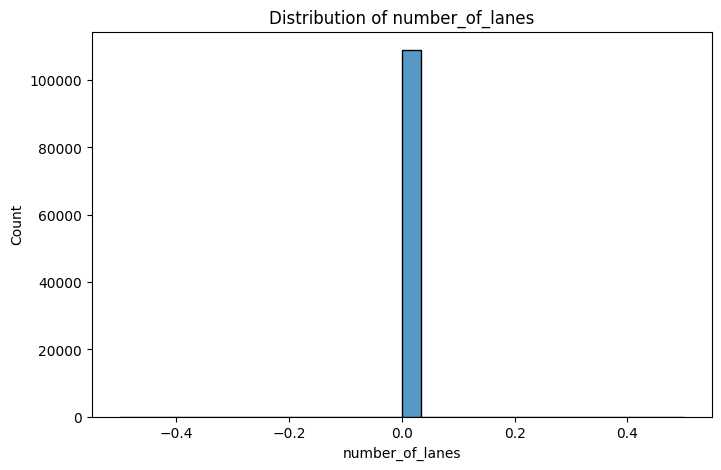

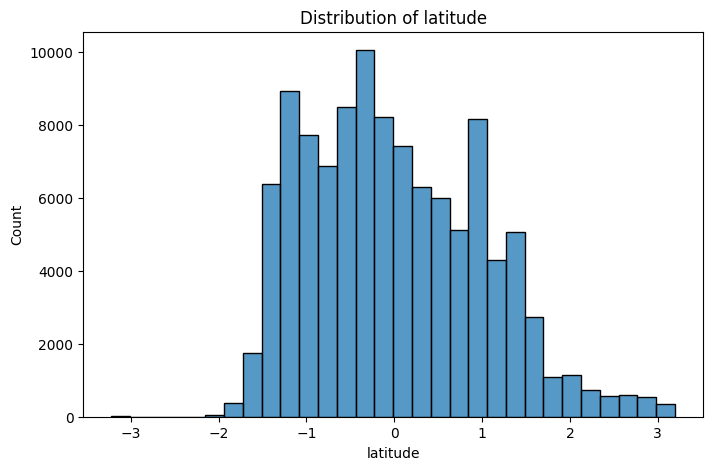

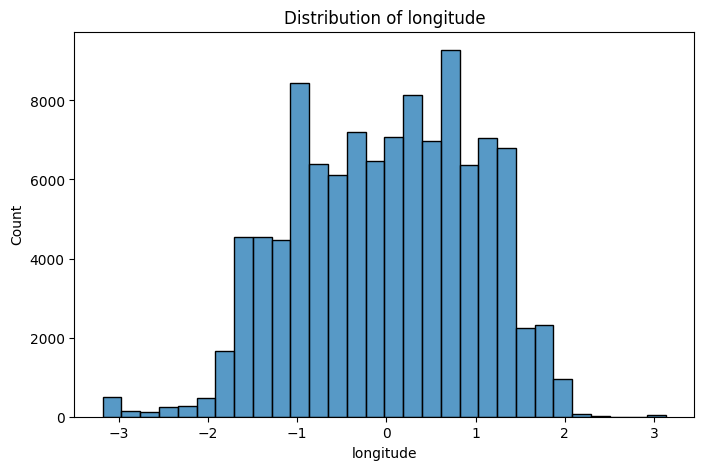

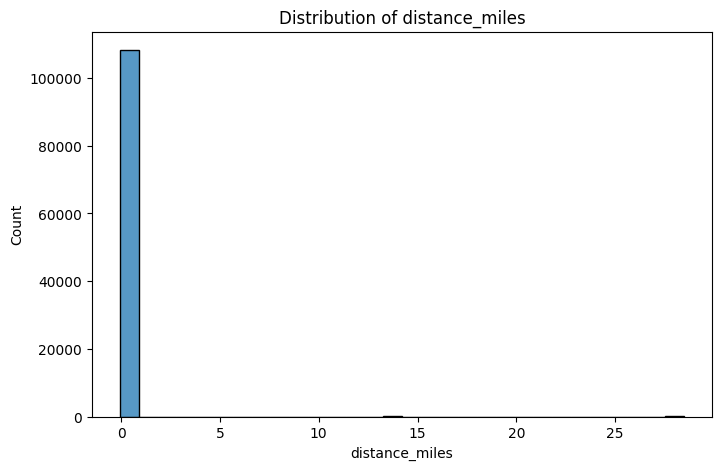

In [89]:
# Plot distribution for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_numerical_cols = df.select_dtypes(include=['number']).columns
for col in cleaned_numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=False, bins=30)  # Disable KDE for performance
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

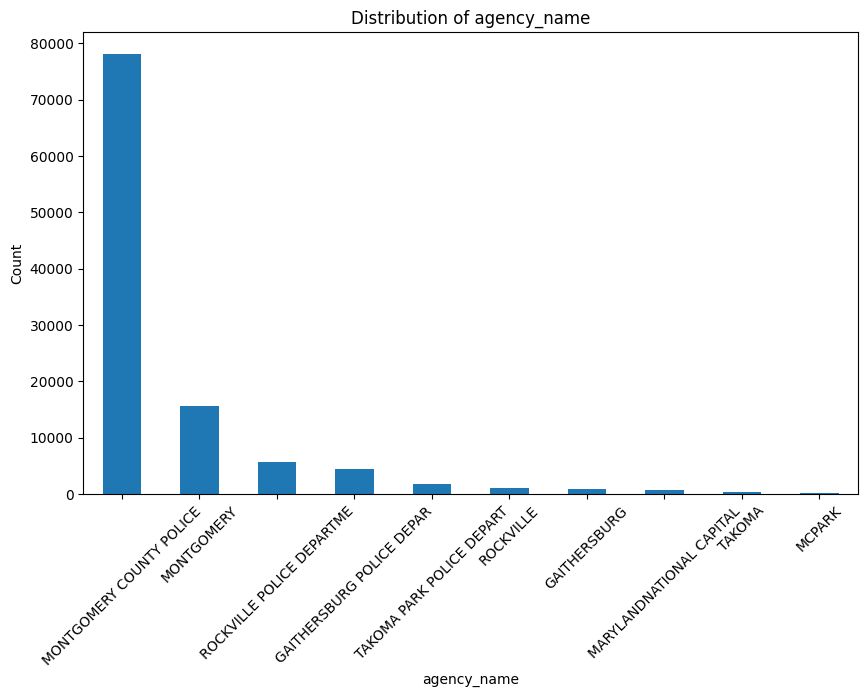

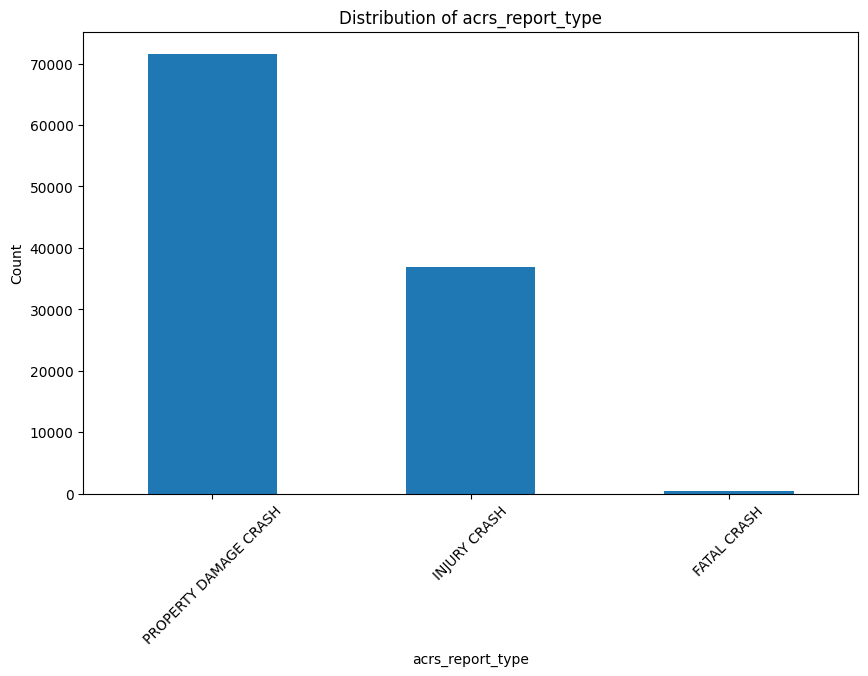

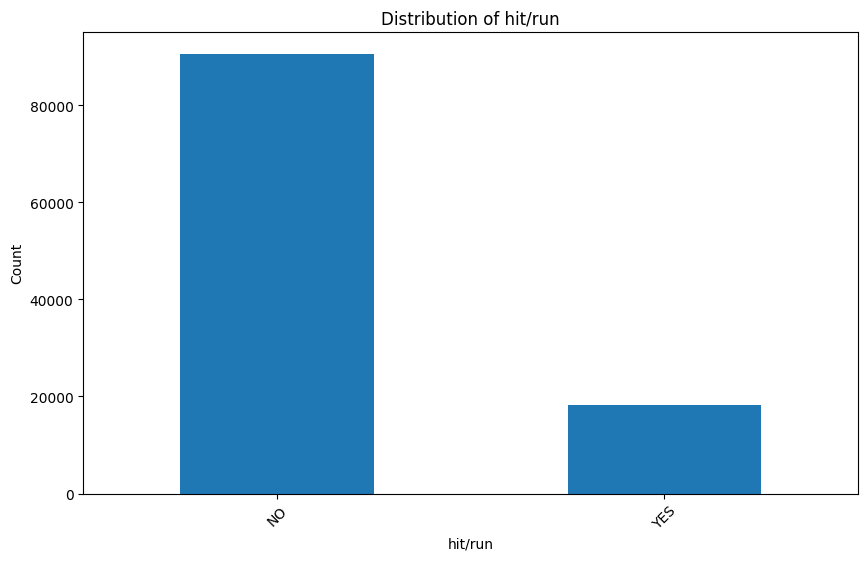

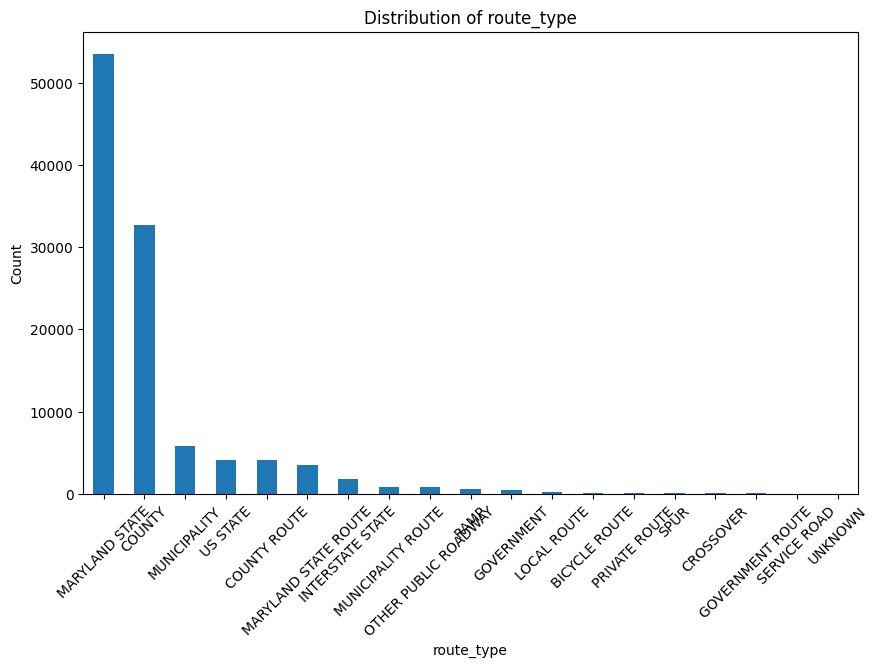

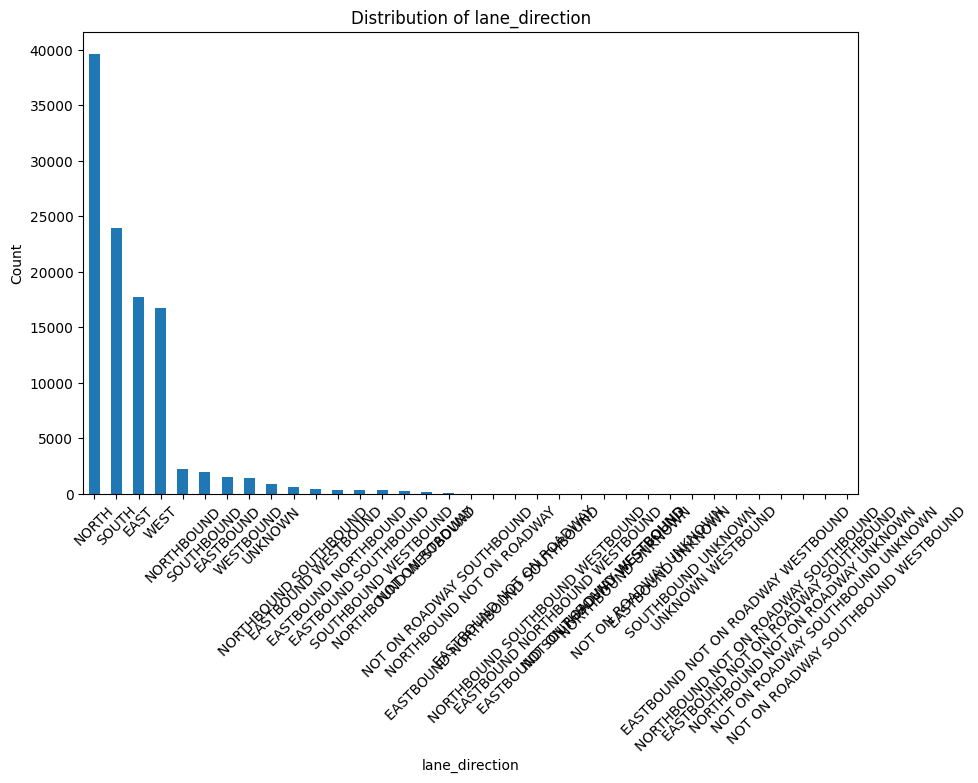

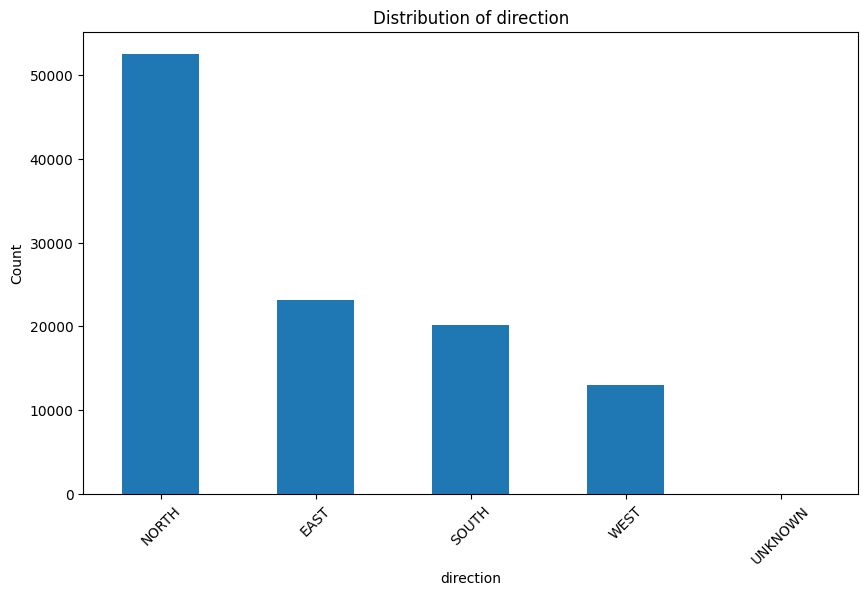

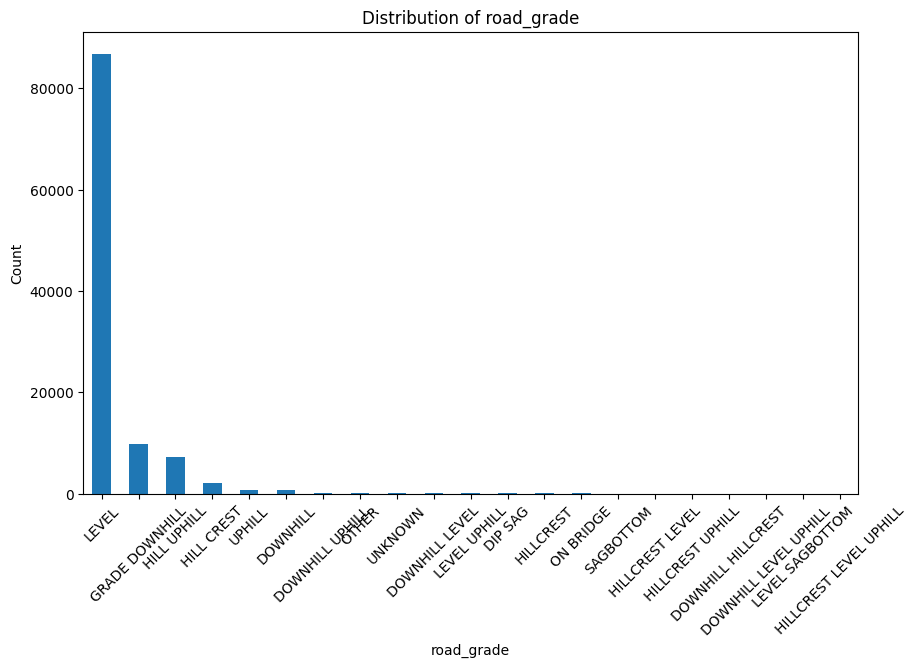

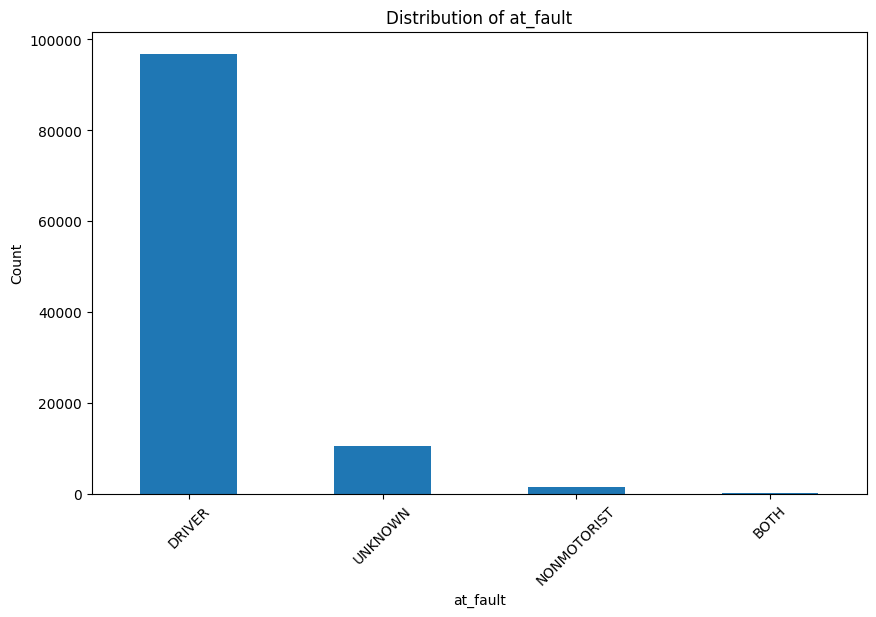

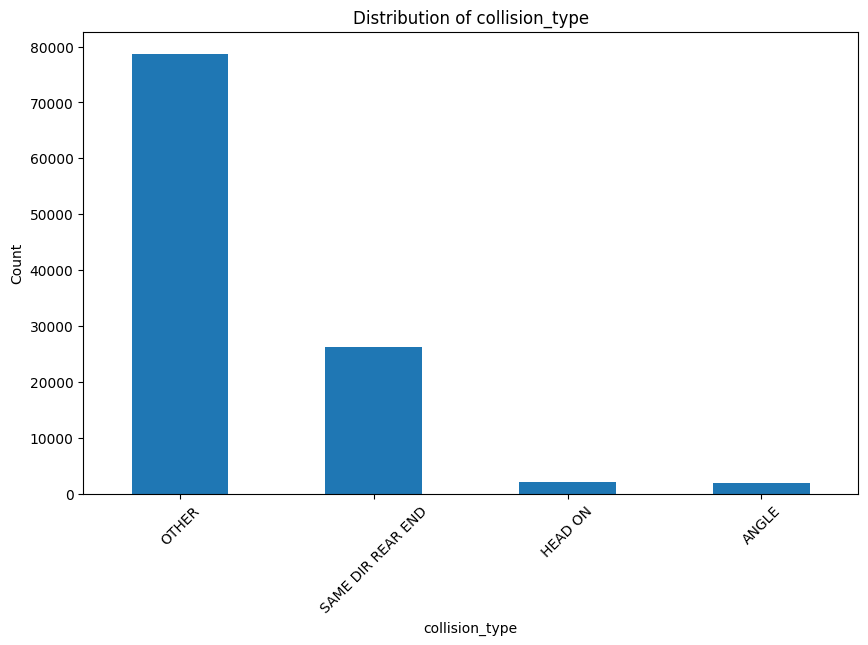

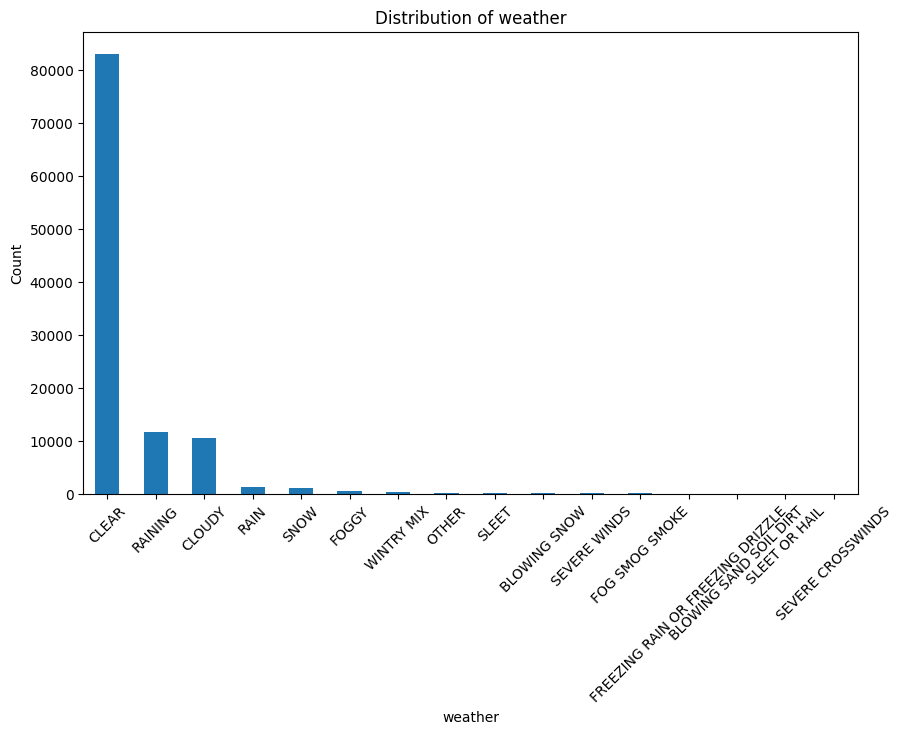

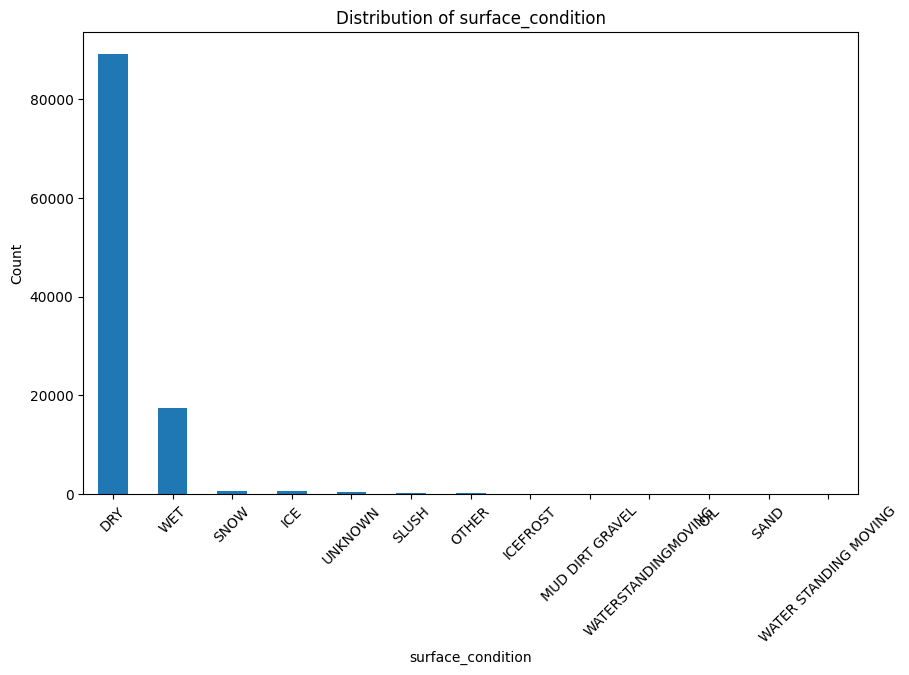

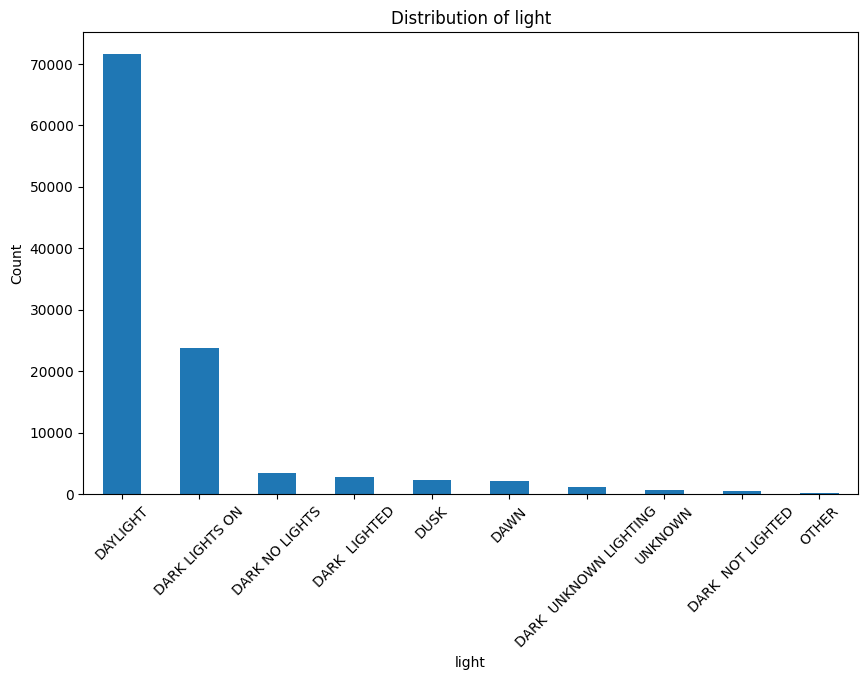

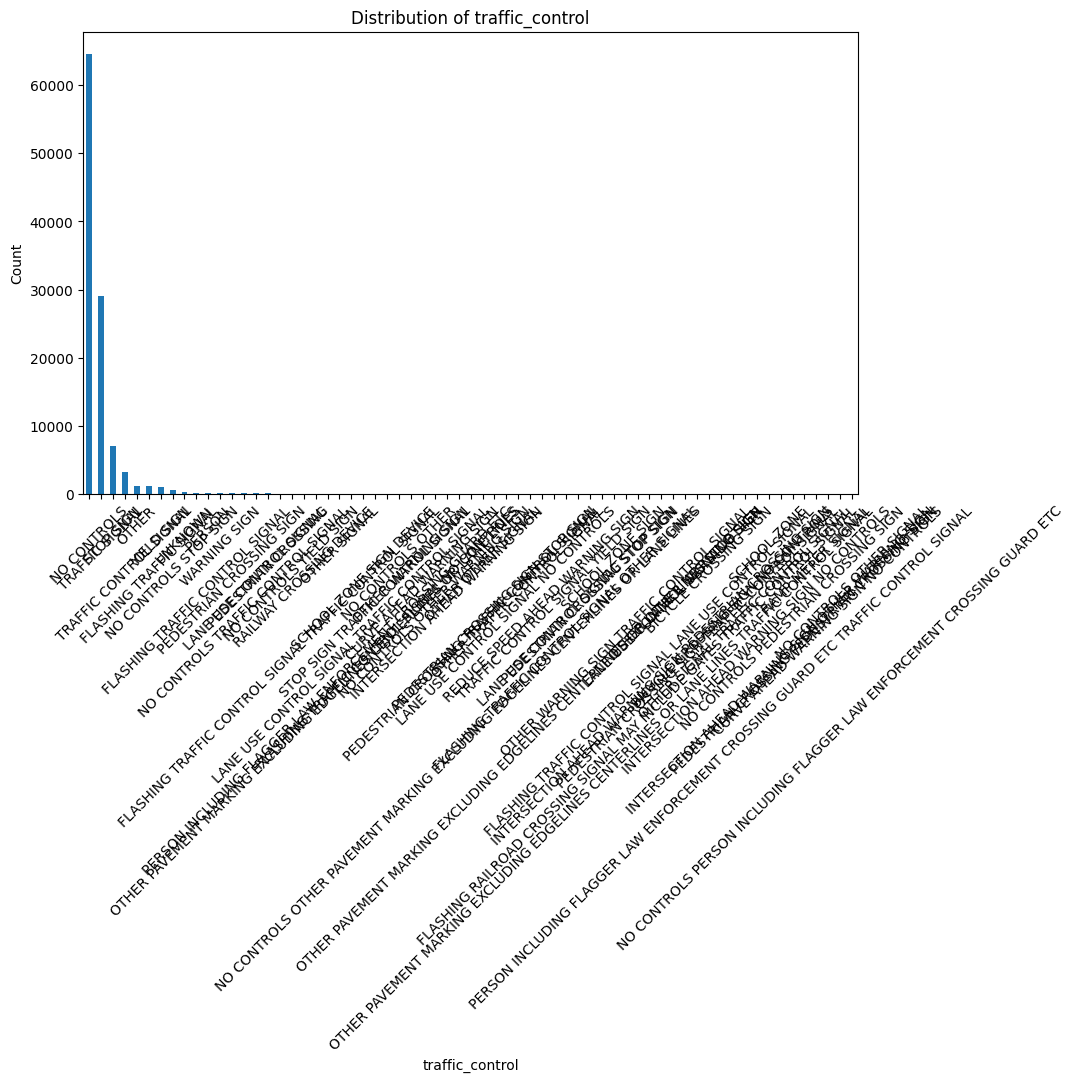

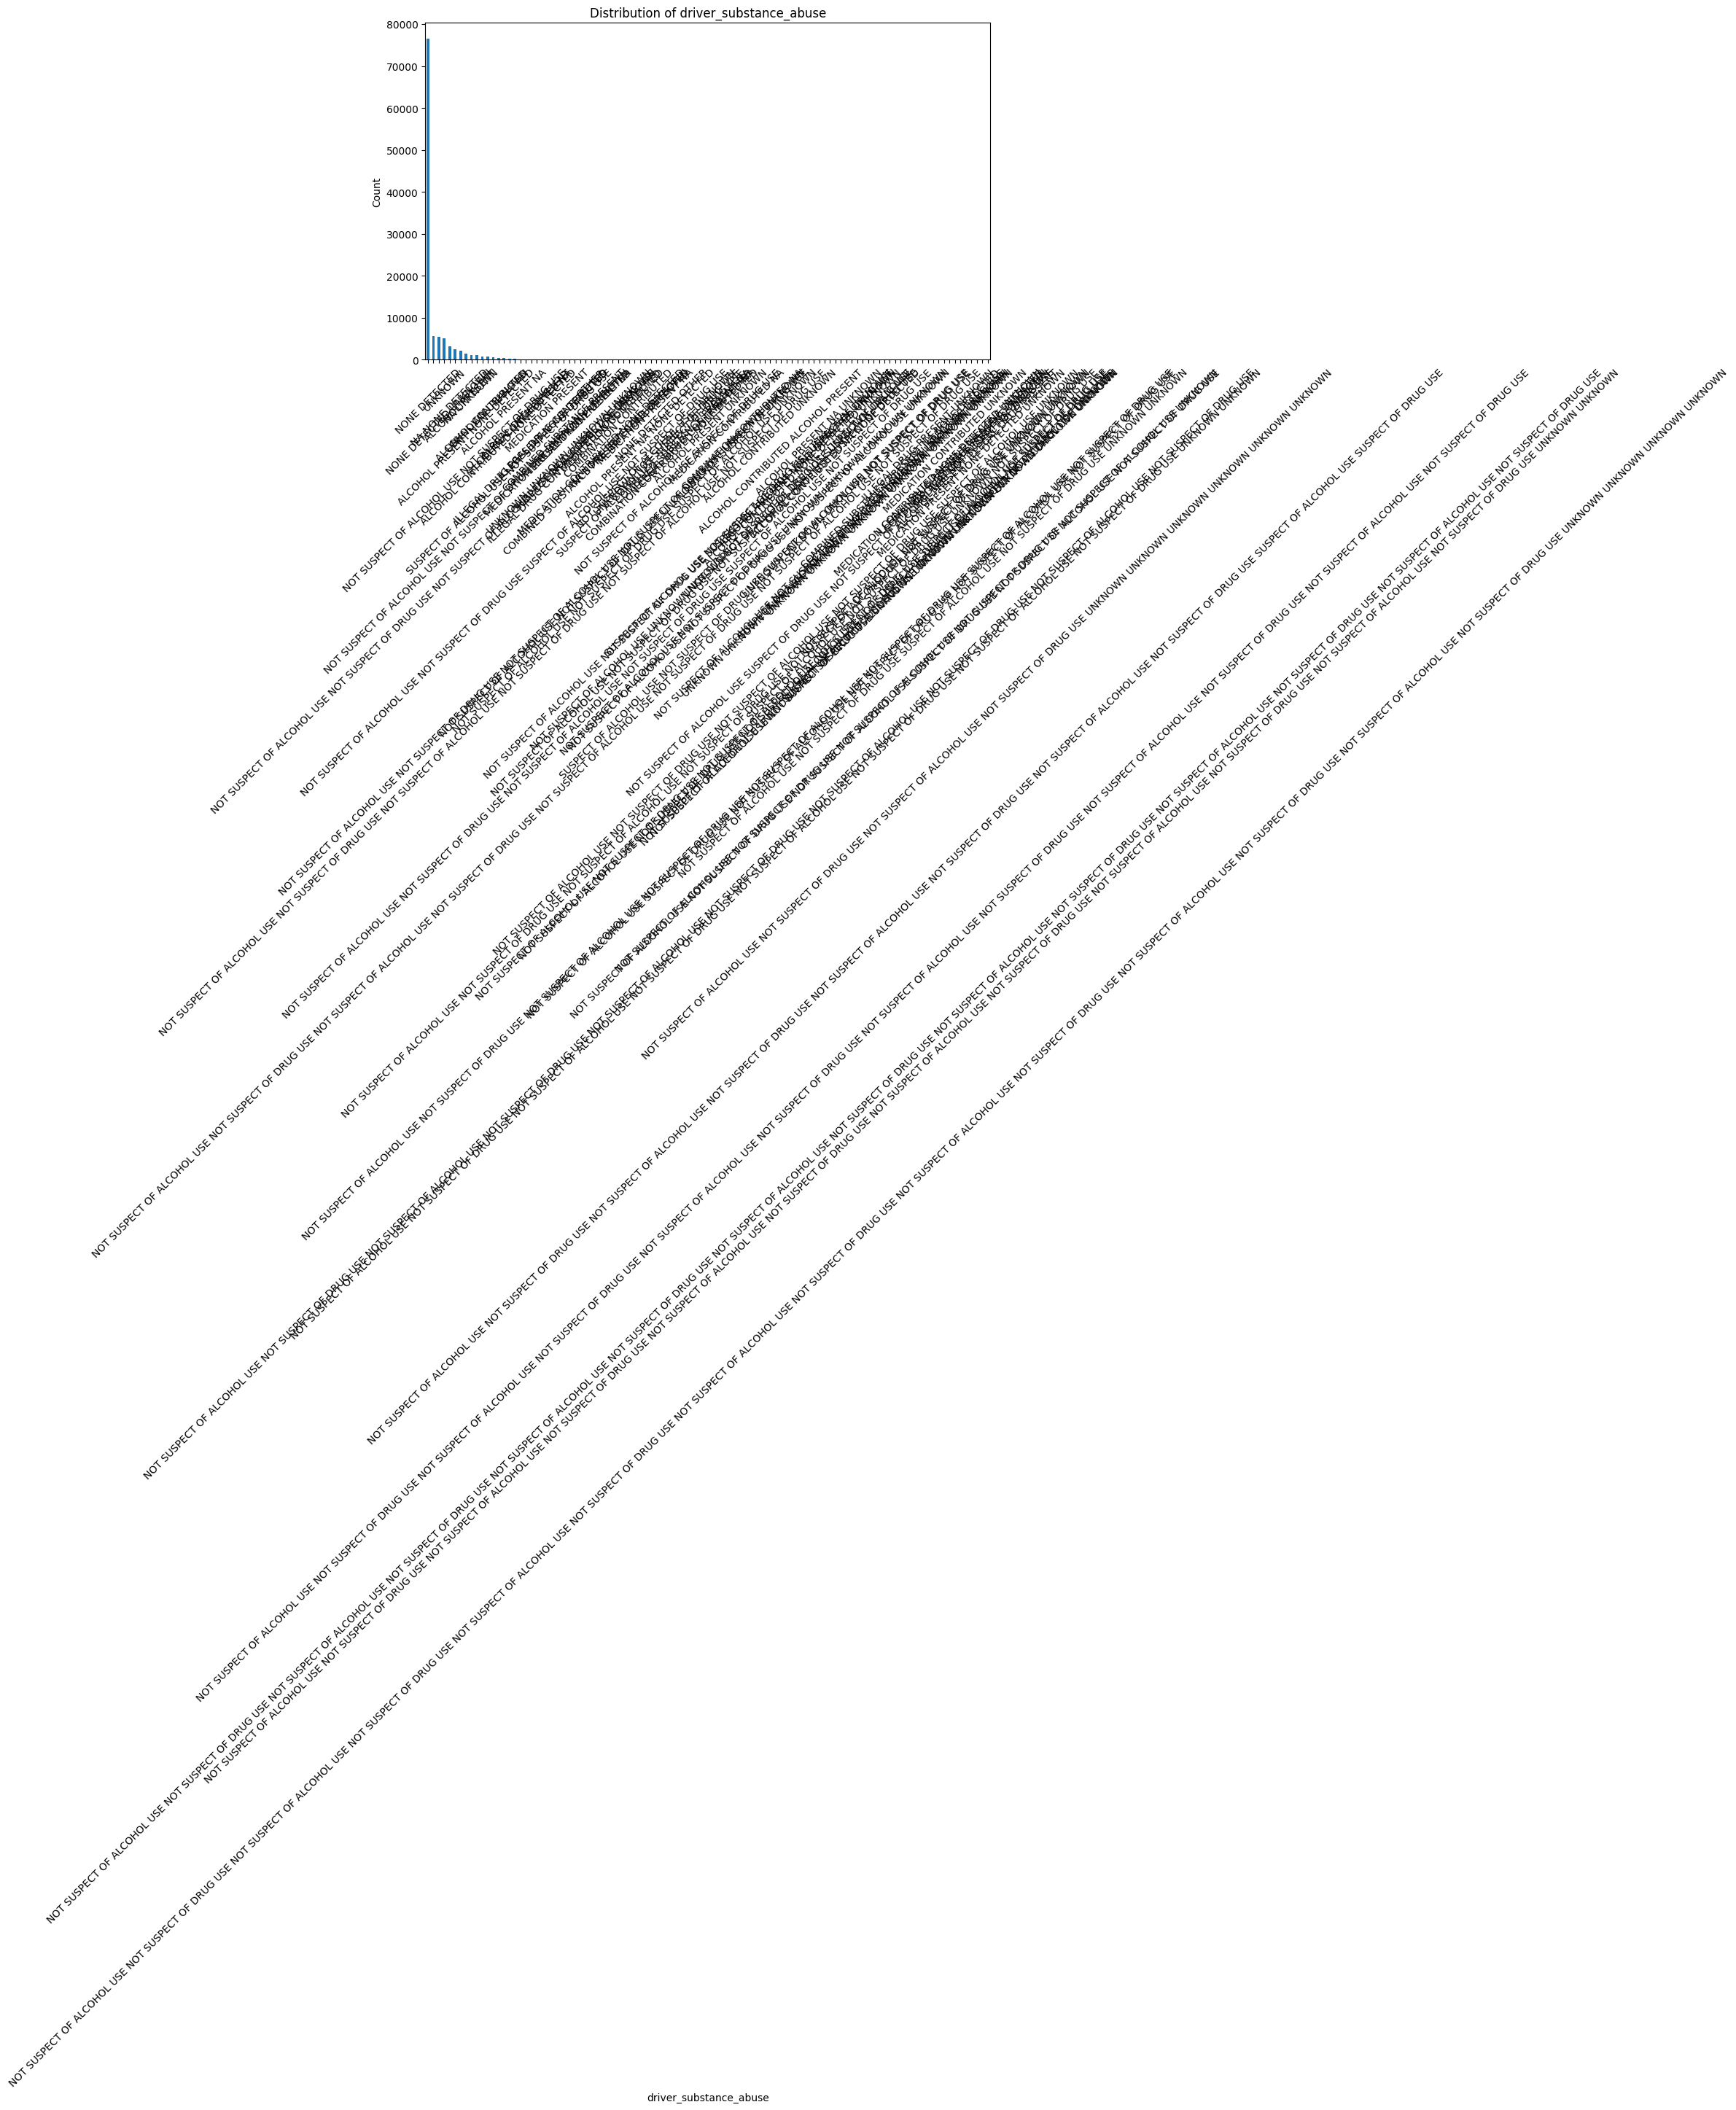

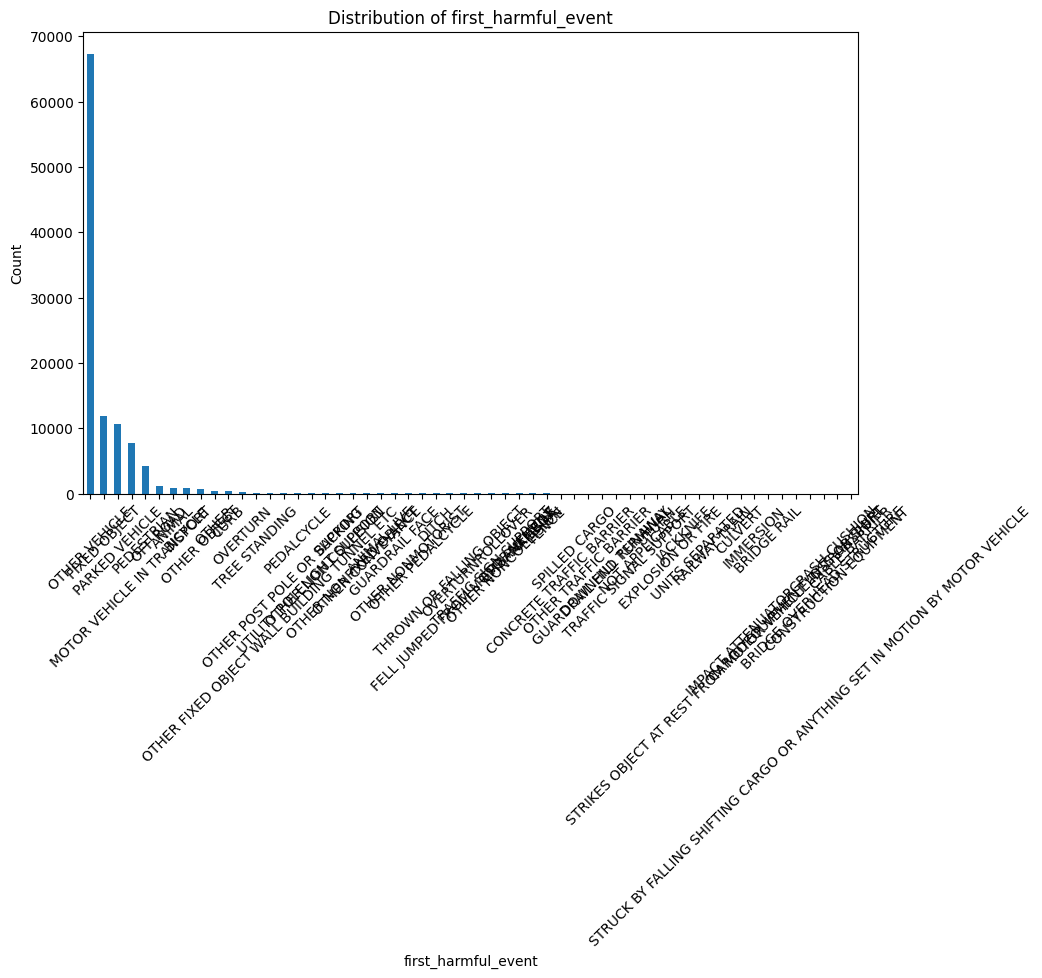

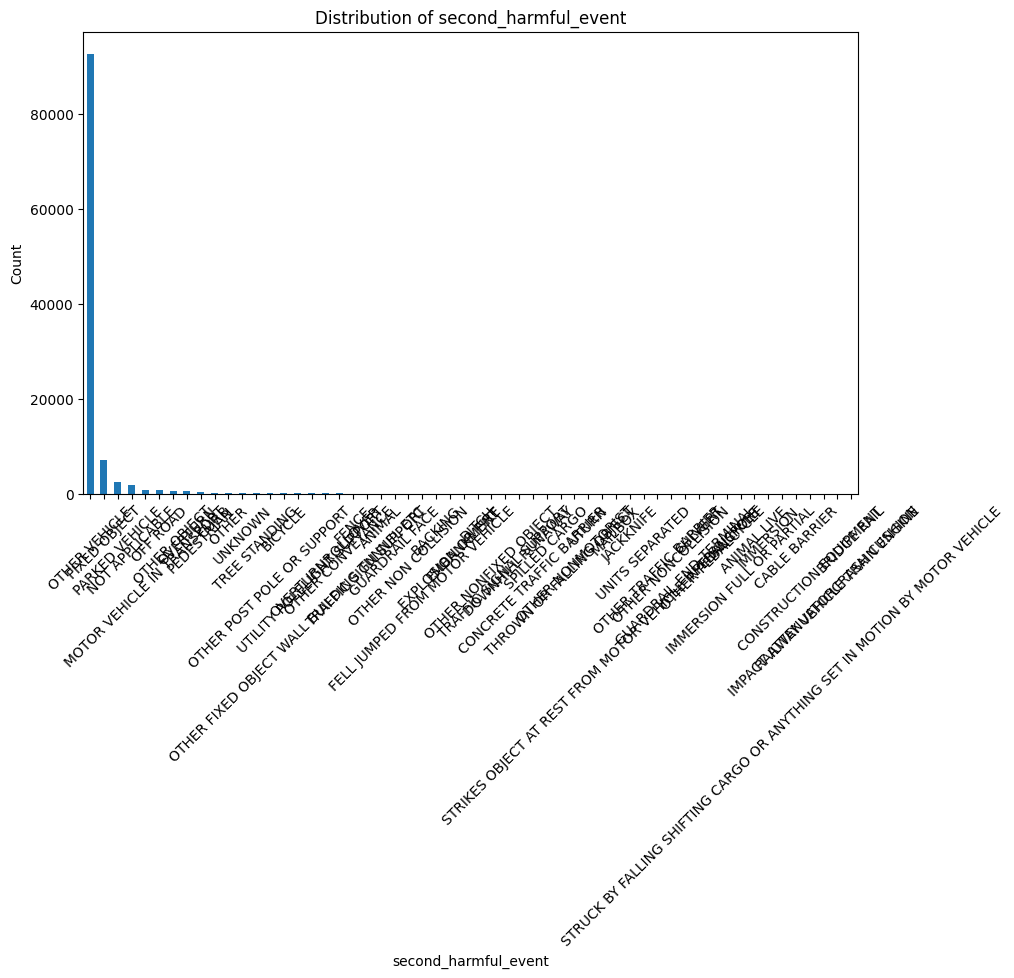

) missing from font(s) DejaVu Sans.on\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


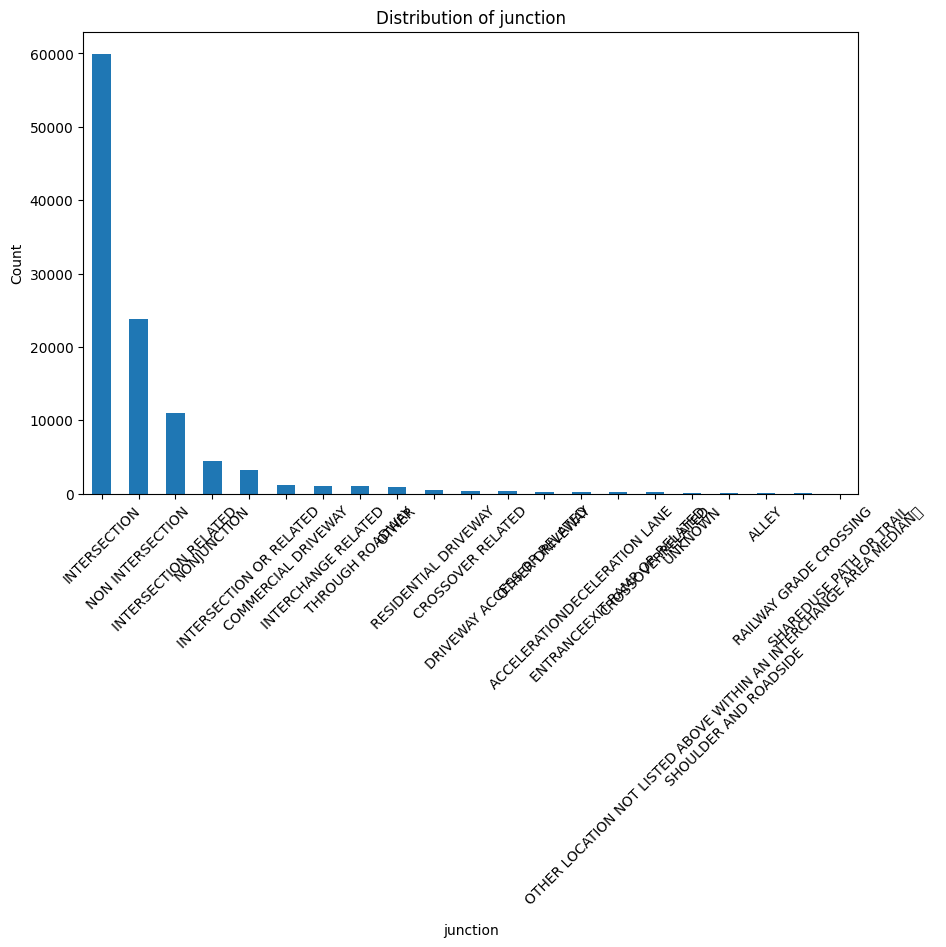

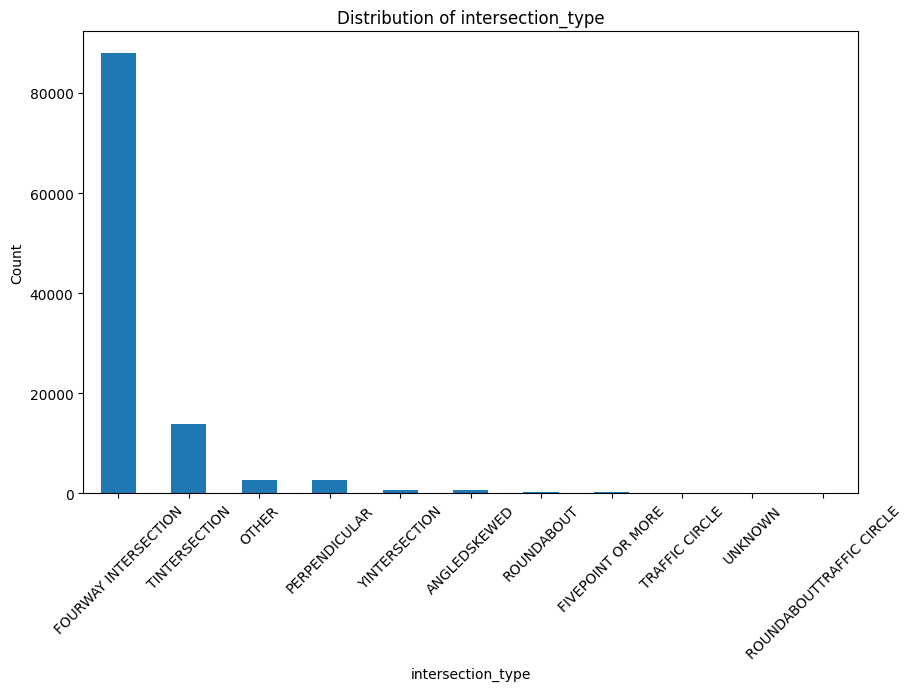

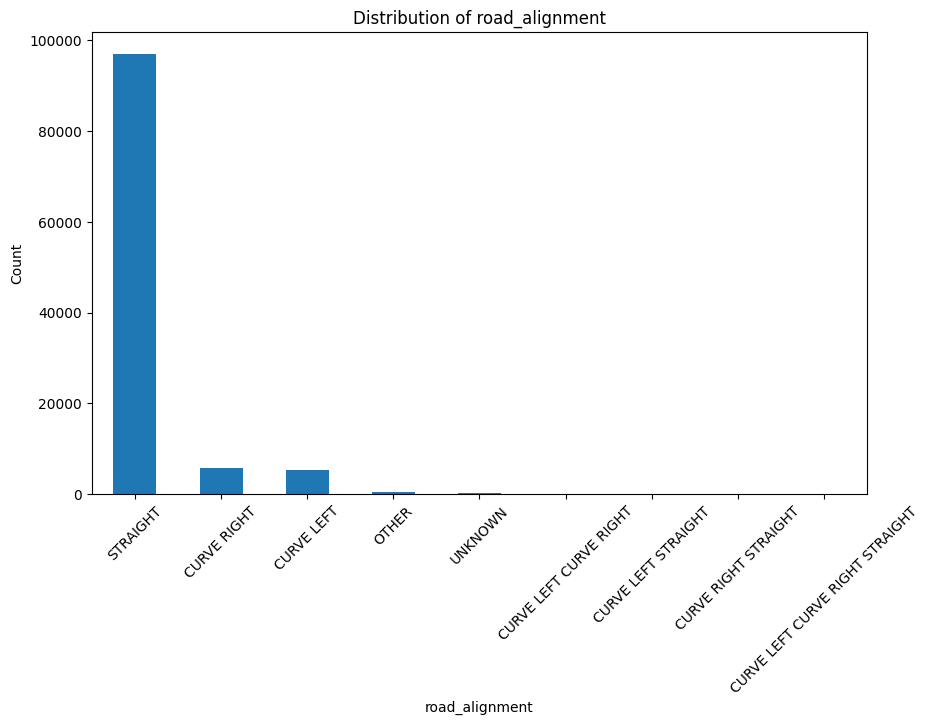

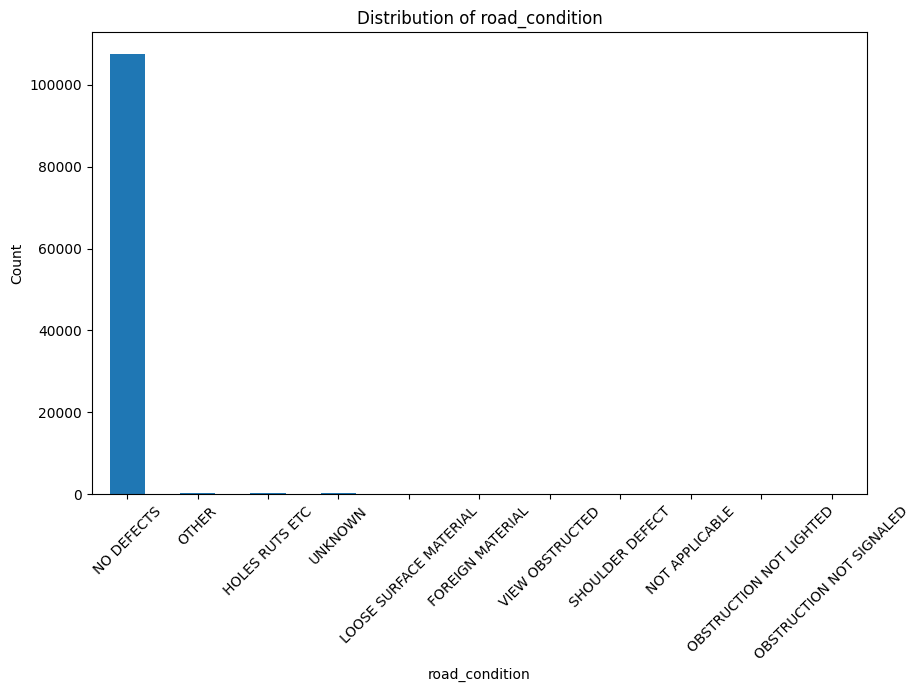

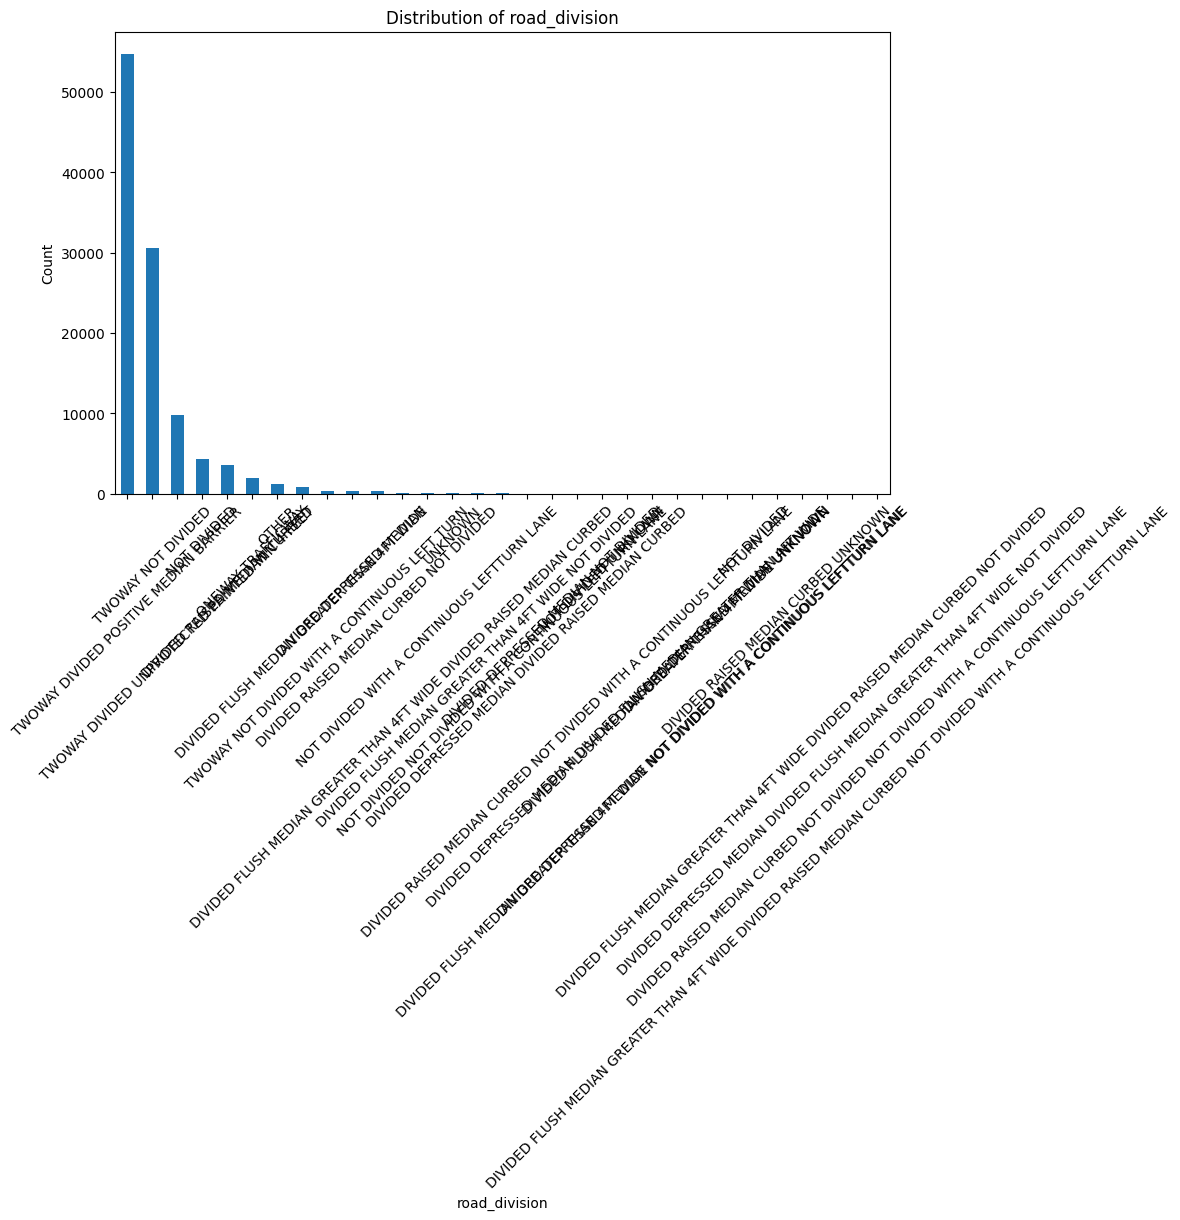

In [90]:
# Plot bar charts for categorical columns
cleaned_categorical_cols = df.select_dtypes(include=['object']).columns
for col in cleaned_categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


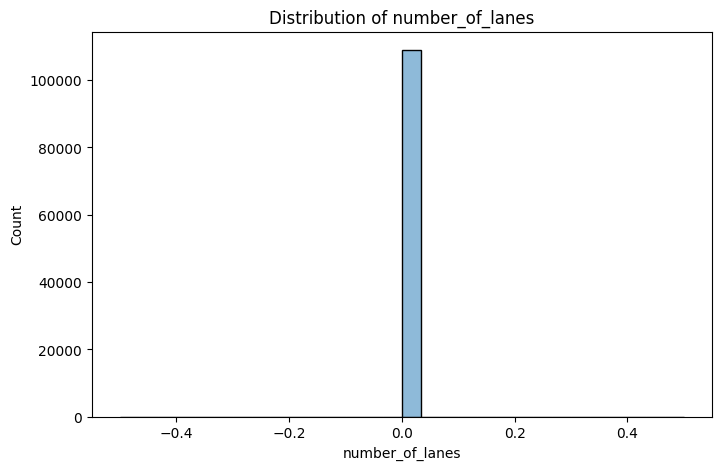

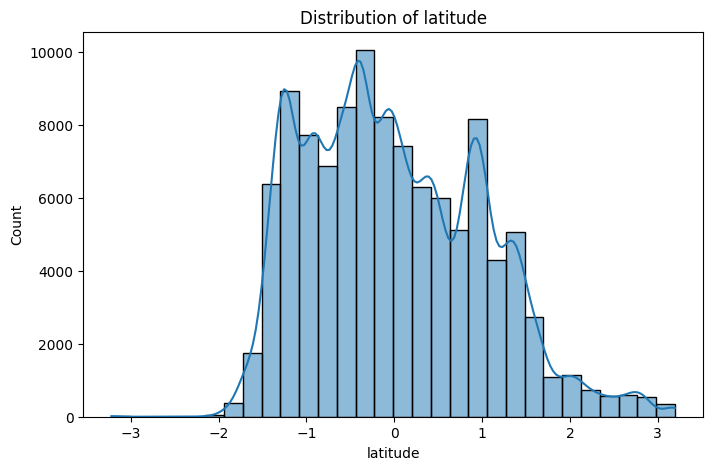

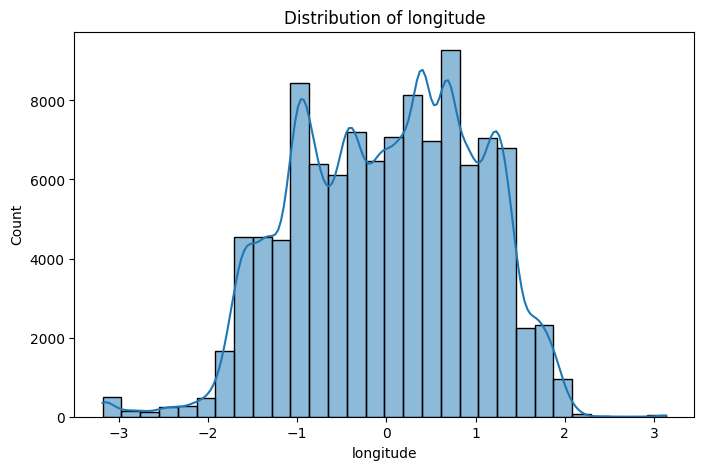

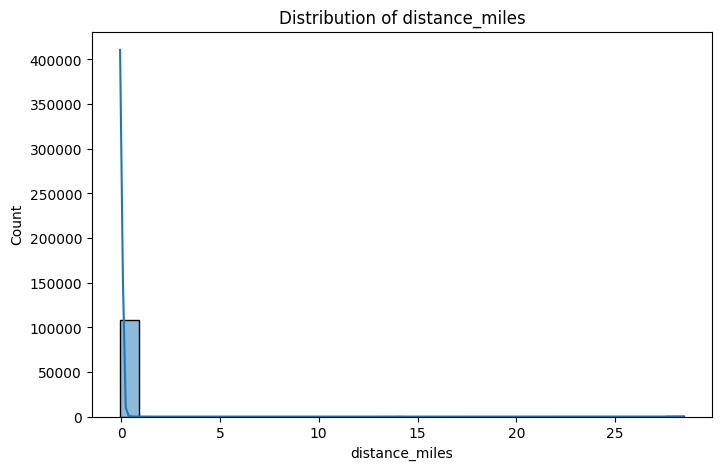

In [92]:
plt.ion()

for col in cleaned_numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [93]:
!pip install ace_tools


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
!pip install -U pip setuptools

  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 33.6 MB/s eta 0:00:00
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\bhars\anaconda3\python.exe -m pip install -U pip setuptools


In [95]:
import pandas as pd
from sklearn.feature_selection import f_classif

# Prepare data for feature importance calculation
X = df.drop('first_harmful_event', axis=1)
y = df['first_harmful_event']

# Convert datetime columns to numeric (Unix timestamp) or drop them if unnecessary
for col in X.columns:
    if pd.api.types.is_datetime64_any_dtype(X[col]):
        # Convert datetime to timestamp
        X[col] = X[col].astype('int64') // 10**9

# Convert categorical variables to numerical form
X_encoded = pd.get_dummies(X, drop_first=True)

# Ensure all columns are numeric
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Drop columns with NaN (resulting from failed conversions)
X_encoded = X_encoded.dropna(axis=1)

# Calculate F-value and p-value
f_values, p_values = f_classif(X_encoded, y)

# Create a DataFrame for easy interpretation
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'F-value': f_values, 'p-value': p_values})

# Sort by importance
importance_df.sort_values(by='F-value', ascending=False, inplace=True)

# Display the feature importance
print("Feature Importance with F-values and P-values")
print(importance_df)


C:\Users\bhars\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [  1 307] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\bhars\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\bhars\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Feature Importance with F-values and P-values
                                               Feature      F-value  p-value
307        second_harmful_event_CONSTRUCTION EQUIPMENT          inf      0.0
246  driver_substance_abuse_NOT SUSPECT OF ALCOHOL ...  3680.526994      0.0
245  driver_substance_abuse_NOT SUSPECT OF ALCOHOL ...  1647.355831      0.0
7                               agency_name_MONTGOMERY  1314.324915      0.0
418         road_division_DIVIDED RAISED MEDIAN CURBED  1004.760024      0.0
..                                                 ...          ...      ...
225  driver_substance_abuse_ILLEGAL DRUG PRESENT NA...     0.011231      1.0
219  driver_substance_abuse_COMBINED SUBSTANCE PRES...     0.011231      1.0
205  driver_substance_abuse_ALCOHOL PRESENT ILLEGAL...     0.011231      1.0
217  driver_substance_abuse_COMBINED SUBSTANCE PRES...     0.011231      1.0
1                                      number_of_lanes          NaN      NaN

[434 rows x 3 columns]


In [96]:
import matplotlib.pyplot as plt

# Plotting F-values and p-values for all features
plt.figure(figsize=(14, 6))

# Sort features by F-value for better visualization
sorted_df = importance_df.sort_values(by='F-value', ascending=False)

# Plot F-values
plt.bar(sorted_df['Feature'], sorted_df['F-value'], color='skyblue', label='F-value')

# Overlay p-values as red dots
plt.scatter(sorted_df['Feature'], sorted_df['p-value'] * max(sorted_df['F-value']), color='red', label='p-value (scaled)', zorder=5)

plt.xlabel('Features')
plt.ylabel('Values (F-value & Scaled p-value)')
plt.title('Feature Importance based on F-value and p-value')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

) missing from font(s) DejaVu Sans.pykernel_26656\2733879490.py:20: UserWarning: Glyph 13 (
  plt.tight_layout()


TypeError: _compat_get_offset.<locals>.<lambda>() missing 2 required positional arguments: 'bbox' and 'renderer'

) missing from font(s) DejaVu Sans.on\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)


Error in callback <function _draw_all_if_interactive at 0x00000242C5EB2FC0> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True],
       fill_value=1e+20,
            dtype=float64)

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1400x600 with 1 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [ ]:
cleaned_numerical_cols

In [116]:
# Drop the 'number_of_lanes' column
df.drop('number_of_lanes', axis=1, inplace=True)

In [118]:
df.head()

agency_name  acrs_report_type     crash_date/time  hit/run  route_type  \
0            5                 1 2019-03-04 08:41:00        0           8   
1            5                 2 2016-06-04 19:14:00        1           1   
2            4                 2 2015-08-18 23:00:00        0           1   
3            5                 1 2023-08-24 07:46:00        0           8   
4            7                 2 2023-08-12 16:28:00        1           8   

   lane_direction  direction  road_grade  at_fault  collision_type  ...  \
0              33          0           6         1               3  ...   
1               0          0          13         1               2  ...   
2              27          2          13         3               2  ...   
3              33          4          13         1               2  ...   
4              27          2          13         1               2  ...   

   first_harmful_event  second_harmful_event  junction  intersection_type  \
0                   39                    38        11                  2   
1                   42                    38        11                  2   
2                   42                    38        11                  2   
3                   39                    38        11                  2   
4                   39                    38         8                  2   

   road_alignment  road_condition  road_division  latitude  longitude  \
0               7               3             28  0.402501   0.589016   
1               7               3             28 -1.421200   0.363180   
2               7               3             28  1.473410  -1.213359   
3               0               3             26 -0.594206   0.666926   
4               7               3             28  0.006228  -0.356431   

   distance_miles  
0       -0.041124  
1       -0.041124  
2       -0.044928  
3       -0.043863  
4       -0.044395  

[5 rows x 25 columns]

In [120]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to the specified categorical columns
for col in cleaned_categorical_cols:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col].astype(str))

# Save the encoded dataset
df.to_csv("Encoded_Crash_Dataset.csv", index=False)


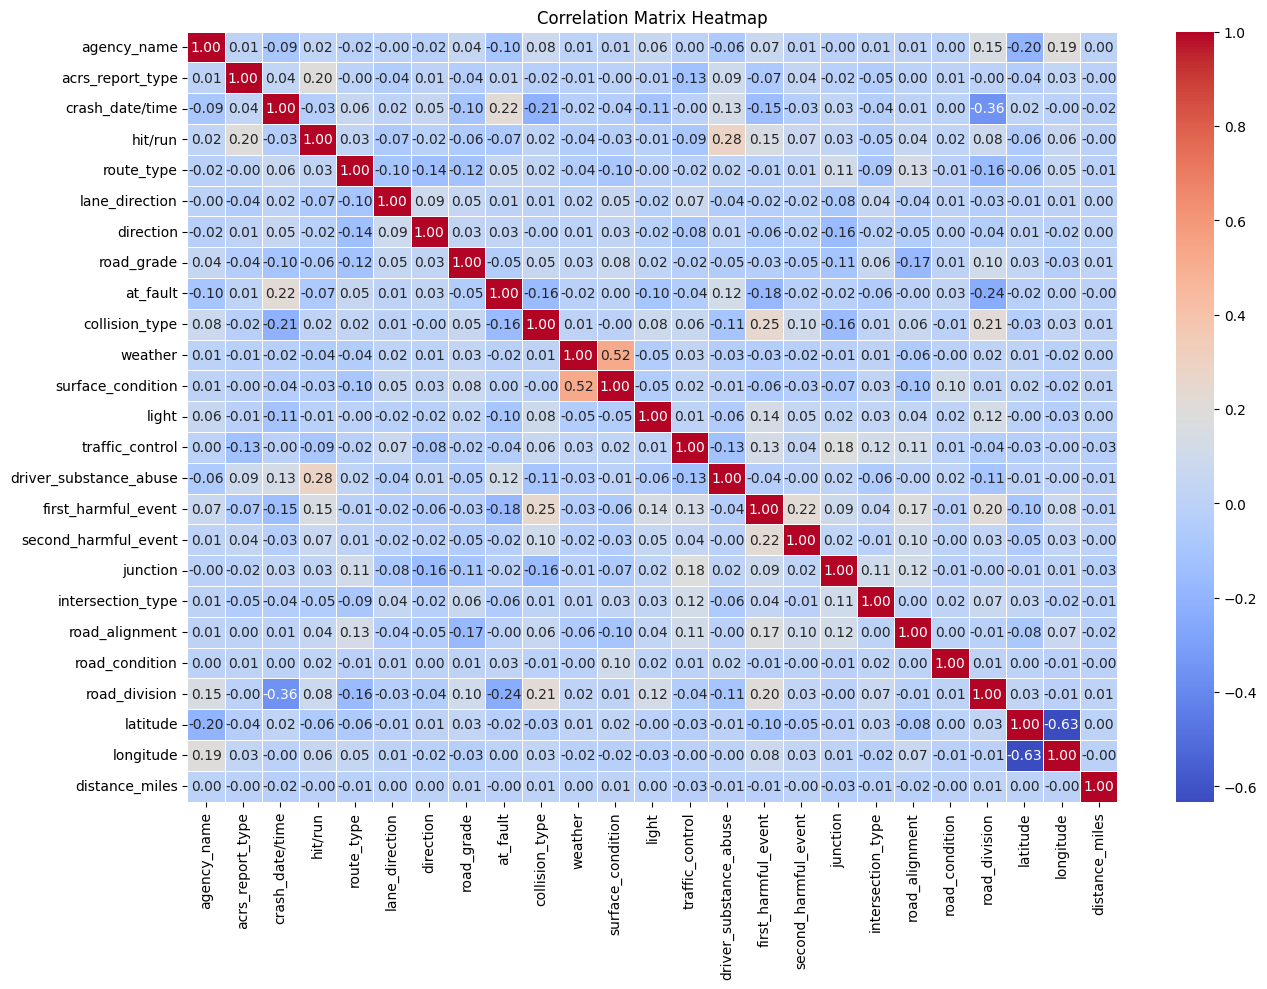

In [121]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Done with the cleaning!